In [4]:
# load library
import requests
import os
from datetime import datetime
from dateutil.relativedelta import relativedelta, FR
import fitz
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import time

# download file from url
def pdfDownload(save_path, url, headers, file_nm, param=None, retries=3):
	resp = None

	try:
		resp = requests.get(url, params=param, headers=headers)
		resp.raise_for_status()

		pdf_layer = save_path +  file_nm + ".pdf"

		with open(pdf_layer, 'wb') as f:
			f.write(resp.content)
		#print("complete writing pdf!")

	except requests.exceptions.HTTPError as e:
		if 500 <= resp.status_code < 600 and retries > 0:
			print('Retries : {0}'.format(retries))
			return getDownload(url, param, retries - 1)
		else:
			return resp.status_code
	return resp

def importImgFromPDF(save_path, file, start_page = 1, end_page = 1):

	doc = fitz.open(file)

	# get img page by
	for i in range( start_page-1, end_page ):
		for img in doc.getPageImageList(i):
			xref = img[0]
			pix = fitz.Pixmap(doc, xref)
			if pix.n < 5:  # this is GRAY or RGB
				pix.writePNG(save_path + "p%s-%s.png" % (i, xref))
			else:  # CMYK: convert to RGB first
				pix1 = fitz.Pixmap(fitz.csRGB, pix)
				pix1.writePNG(save_path + "p%s-%s.png" % (i, xref))
				pix1 = None
			pix = None

	#print("img from PDF has been saved!")

def importImgFromURL(save_path, url, file_nm):

	response = requests.get(url)
	img = Image.open(BytesIO(response.content))
	img_save_path = save_path + file_nm + '.png'
	img.save(img_save_path)
	#print("img from URL has been saved!")

# download file from url
def fredREQ(url, headers, param=None, retries=3):
	resp = None

	try:
		resp = requests.get(url, params=param, headers=headers)
		resp.raise_for_status()
	except requests.exceptions.HTTPError as e:
		if 500 <= resp.status_code < 600 and retries > 0:
			print('Retries : {0}'.format(retries))
			return fredREQ(url, param, retries - 1)
		else:
			return resp.status_code
	return resp


In [30]:
save_path = "/home/niceguy1575/"

url = "https://money.cnn.com/data/fear-and-greed/"
headers = {'Referer': url,
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}

req = fredREQ(url, headers)
req_txt = req.text
soup = BeautifulSoup(req_txt, 'html.parser')

id_url = soup.find_all("div", {"id": "feargreedOverTime"})

style_url = id_url[0]['style']
img_url = style_url.split("('", 1)[1].split("')")[0]

today = datetime.now()

fear_greed_nm = "FEAR&GREED_image" #+ today_str
importImgFromURL(save_path, img_url, fear_greed_nm)

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Stock Price')

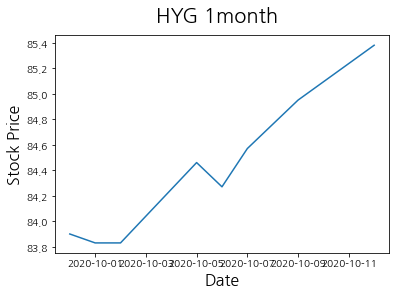

In [42]:
start_date = datetime.now()
start_str = start_date.strftime('%Y-%m-%d')

end_date = datetime.now() - relativedelta(months=1)
end_str = end_date.strftime('%Y-%m-%d')

In [46]:
def draw_yh_stock_price(stock_name, start_date, end_date,
						save_path, save_name):

	fig = plt.figure()
	plt.suptitle('ggplot style')

	data = yf.download(stock_name, start_date, end_date) 

	plt.plot(data.index, data.Close)

	fig.suptitle("HYG 1month", fontsize = 20)
	plt.xlabel("Date", fontsize = 16)
	plt.ylabel("Stock Price", fontsize = 16)
	fig.savefig(save_path + save_name)

[*********************100%***********************]  1 of 1 completed


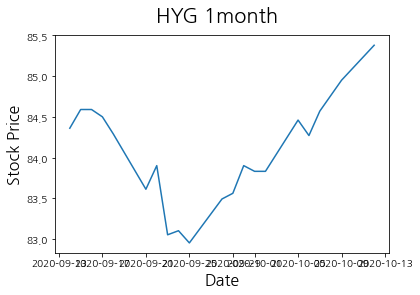

In [50]:
end_date = datetime.now()
end_str = end_date.strftime('%Y-%m-%d')

start_date = end_date - relativedelta(months=1)
start_str = start_date.strftime('%Y-%m-%d')

draw_yh_stock_price('HYG', start_str, end_str, save_path, "HYG-1month")

In [54]:
import re


other_path = os.getcwd() + "/data/"
other_files = os.listdir(other_path)

fg = re.compile("^FG")
fg_name = list(filter(fg.search, other_files))[0]
other_path + fg_name
#fg_img.upload_file(other_path + fg_name)


'/home/niceguy1575/2020/개인/economy_stats/src/data/FG_image.png'